<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/Jinsup/AI4I_2020_Jinsup_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 파일 불러오기 및 전처리

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [4]:
# 파일 불러오기
df = pd.read_csv('/content/ai4i2020.csv')

In [5]:
# UDI를 인덱스로
df.set_index('UDI',inplace=True)

In [6]:
# 컬럼명 단위 삭제
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)

In [7]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15

In [8]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'회전력',
                   'Tool wear':'공구 마모 시간',
                   'Machine failure':'고장 여부',
                   'TWF':'고장 원인 : 공구 마모',
                   'HDF':'고장 원인 : 열 방산',
                   'PWF':'고장 원인 : 동력 이상',
                   'OSF':'고장 원인 : 과부하',
                   'RNF':'고장 원인 : 무작위'},inplace=True)
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


In [9]:
# 그패프 작성을 위해 <'고장 여부'의 0과 1을 '정상'과 '고장'으로>
import copy
df_고장 = copy.deepcopy(df) # 깊은 복사

df_고장['고장 여부'] = df_고장['고장 여부'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 공구 마모'] = df_고장['고장 원인 : 공구 마모'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 열 방산'] = df_고장['고장 원인 : 열 방산'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 동력 이상'] = df_고장['고장 원인 : 동력 이상'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 과부하'] = df_고장['고장 원인 : 과부하'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 무작위'] = df_고장['고장 원인 : 무작위'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,정상,정상,정상,정상,정상,정상
2,L47181,L,25.05,35.55,1408,46.3,3,정상,정상,정상,정상,정상,정상
3,L47182,L,24.95,35.35,1498,49.4,5,정상,정상,정상,정상,정상,정상
4,L47183,L,25.05,35.45,1433,39.5,7,정상,정상,정상,정상,정상,정상
5,L47184,L,25.05,35.55,1408,40.0,9,정상,정상,정상,정상,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,정상,정상,정상,정상,정상,정상
9997,H39410,H,25.75,35.25,1632,31.8,17,정상,정상,정상,정상,정상,정상
9998,M24857,M,25.85,35.45,1645,33.4,22,정상,정상,정상,정상,정상,정상


# 2. 기초 분석

In [10]:
# 데이터 정보 확인 / null값 존재 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   제품 ID          10000 non-null  object 
 1   제품 유형          10000 non-null  object 
 2   기온             10000 non-null  float64
 3   공정 온도          10000 non-null  float64
 4   회전 속도          10000 non-null  int64  
 5   회전력            10000 non-null  float64
 6   공구 마모 시간       10000 non-null  int64  
 7   고장 여부          10000 non-null  int64  
 8   고장 원인 : 공구 마모  10000 non-null  int64  
 9   고장 원인 : 열 방산   10000 non-null  int64  
 10  고장 원인 : 동력 이상  10000 non-null  int64  
 11  고장 원인 : 과부하    10000 non-null  int64  
 12  고장 원인 : 무작위    10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [11]:
# 데이터 개관 확인
df.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,26.854930,36.855560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.150000,35.650000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,28.350000,37.950000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,31.350000,40.650000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


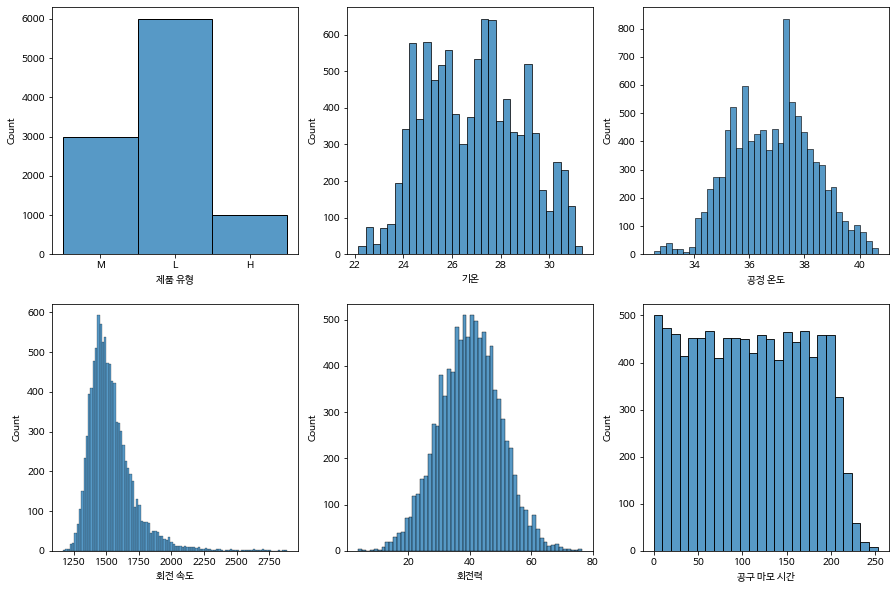

In [12]:
# 변인 분포 시각화
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

sns.histplot(df['제품 유형'],ax=ax1)
sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['회전력'],ax=ax5)
sns.histplot(df['공구 마모 시간'],ax=ax6)

plt.show()

In [13]:
# 고장 원인 갯수 세기
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                        268549.3
공정 온도                                                     368555.6
회전 속도                                                     15387761
회전력                                                       399869.1
공구 마모 시간                                                   1079510
고장 여부                                                          339
고장 원인 : 공구 마모                                                   46
고장 원인 : 열 방산                                                   115
고장 원인 : 동력 이상                                                   95
고장 원인 : 과부하                                                     98
고장 원인 : 무작위                                                     19
dtype: object

<AxesSubplot:>

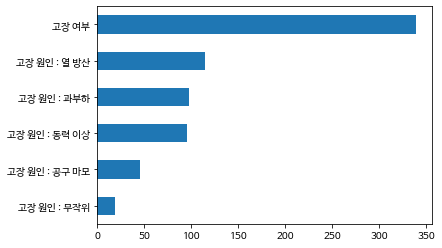

In [14]:
# 고장 원인 갯수 시각화
df[['고장 여부', '고장 원인 : 공구 마모', '고장 원인 : 열 방산', '고장 원인 : 동력 이상', '고장 원인 : 과부하', '고장 원인 : 무작위']].sum().sort_values().plot(kind='barh')

In [15]:
#고장 요인 합계 컬럼 생성
df['고장 요인 합계'] = df['고장 원인 : 열 방산'] + df['고장 원인 : 과부하'] + df['고장 원인 : 동력 이상'] + df['고장 원인 : 공구 마모'] + df['고장 원인 : 무작위']

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


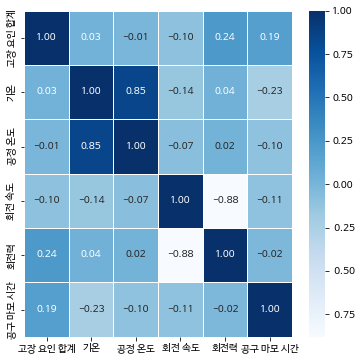

In [16]:
# 상관계수 추출

# 기계 고장 발생 데이터 생성
df_failure =df.groupby('고장 여부')

# 기계 고장 그룹 생성
df_fail_1=df_failure.get_group(1)
df_fail_0=df_failure.get_group(0)

data_failure_Total = df_fail_1[['고장 요인 합계','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]

# failure Total 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_failure_Total.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

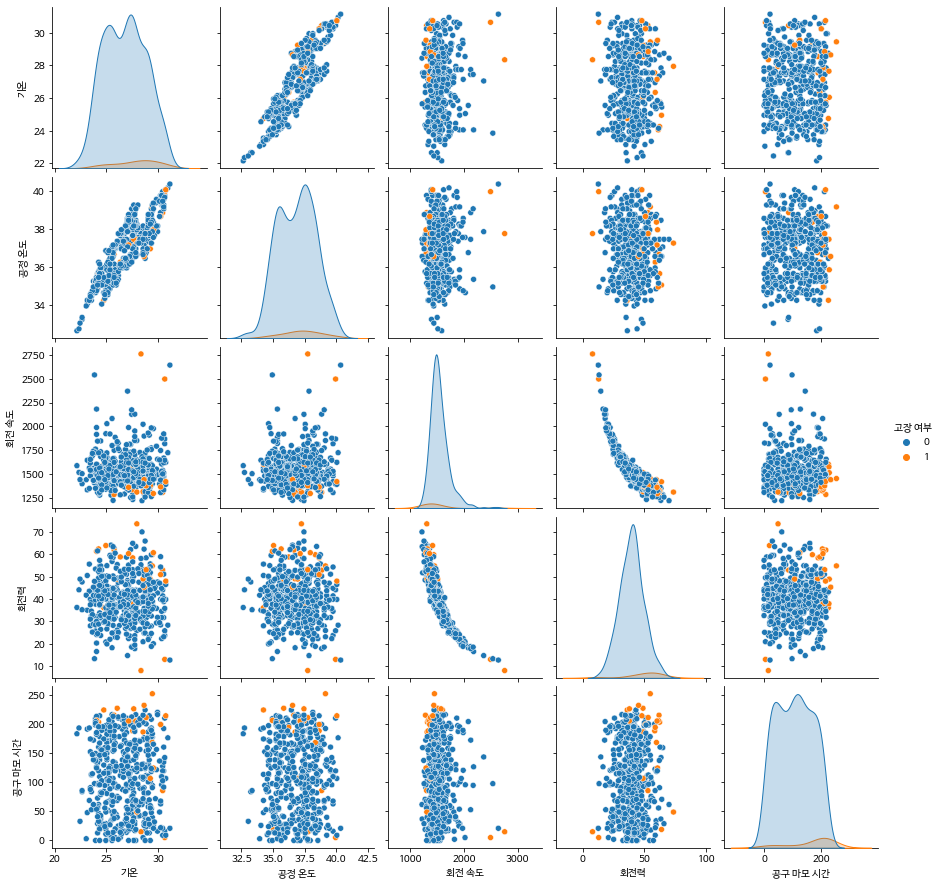

In [18]:
# 페어플롯
sns.pairplot(df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간', '고장 여부']].sample(frac=0.05), hue='고장 여부')

<AxesSubplot:title={'center':'데이터 비교 : 열방산 / 공구 마모 시간'}, xlabel='고장 원인 : 열 방산', ylabel='공구 마모 시간'>

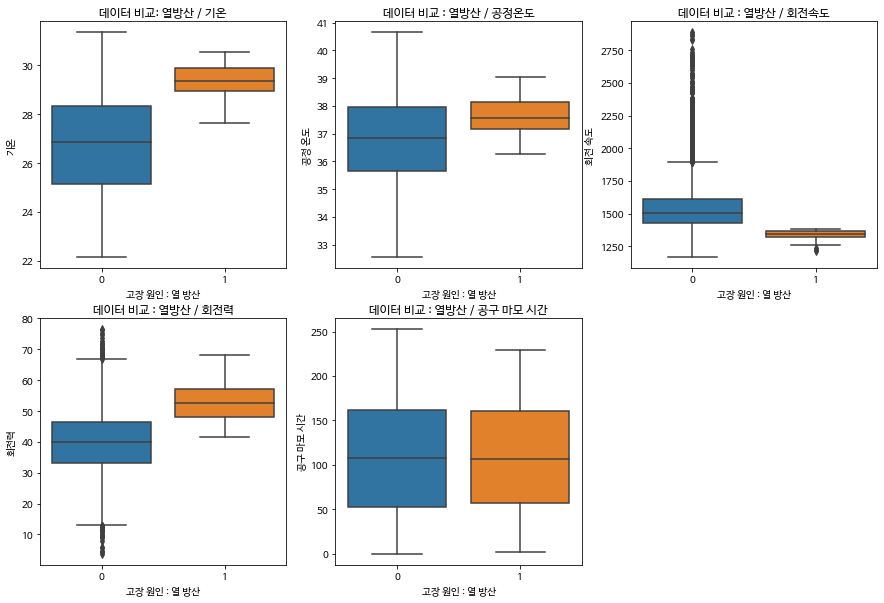

In [19]:
# 각 변수들과 '고장 원인 : 열 방산'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

ax1.set(title='데이터 비교: 열방산 / 기온')
ax2.set(title='데이터 비교 : 열방산 / 공정온도')
ax3.set(title='데이터 비교 : 열방산 / 회전속도')
ax4.set(title='데이터 비교 : 열방산 / 회전력')
ax5.set(title='데이터 비교 : 열방산 / 공구 마모 시간')


ax1.set_xticks([0,1])
ax2.set_xticks([0,1])
ax3.set_xticks([0,1])
ax4.set_xticks([0,1])
ax5.set_xticks([0,1])

ax1.set_xticklabels(['성공','고장'], fontsize=10)
ax2.set_xticklabels(['성공','고장'], fontsize=10)
ax3.set_xticklabels(['성공','고장'], fontsize=10)
ax4.set_xticklabels(['성공','고장'], fontsize=10)
ax5.set_xticklabels(['성공','고장'], fontsize=10)


sns.boxplot(x='고장 원인 : 열 방산', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 열 방산', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 열 방산', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 열 방산', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 열 방산', y='공구 마모 시간', data=df, ax=ax5)





/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


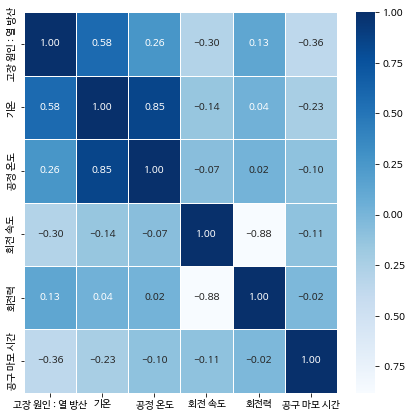

In [20]:
data_HDF = df_fail_1[['고장 원인 : 열 방산','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_HDF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
#plt.savefig('열방산_수정1', transparent = 'True')

<AxesSubplot:xlabel='공구 마모 시간', ylabel='고장 원인 : 열 방산'>

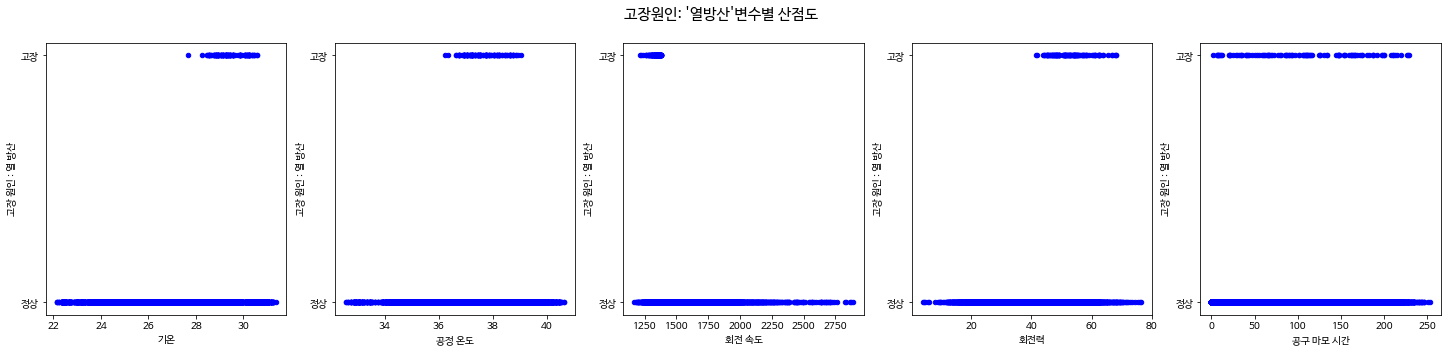

In [21]:
fig = plt.figure(figsize=(25,5))
plt.suptitle("고장원인: '열방산'변수별 산점도",fontsize=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

df_고장.plot(x='기온', y='고장 원인 : 열 방산', kind='scatter', c='blue', ax=ax1)
df_고장.plot(x='공정 온도', y='고장 원인 : 열 방산', kind='scatter', c='blue', ax=ax2)
df_고장.plot(x='회전 속도', y='고장 원인 : 열 방산', kind='scatter', c='blue', ax=ax3)
df_고장.plot(x='회전력', y='고장 원인 : 열 방산', kind='scatter', c='blue', ax=ax4)
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 열 방산', kind='scatter', c='blue', ax=ax5)
#plt.savefig('열방산_수정2', transparent = 'True')

In [22]:
print(df[df['고장 원인 : 열 방산'] == 1]['기온'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 열 방산'] == 1]['회전력'].min())

27.650000000000034
36.25
1379
41.6


In [23]:
# 해석
# 고장 원인 : 열 방산의 경우
# 기온과의 상관계수가 가장 높으며,
# 기온이 27.65도 이상, 공정온도 36.25도 이상, 회전속도 1379 rpm 이하, 회전력 41.6Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

<AxesSubplot:xlabel='고장 원인 : 과부하', ylabel='공구 마모 시간'>

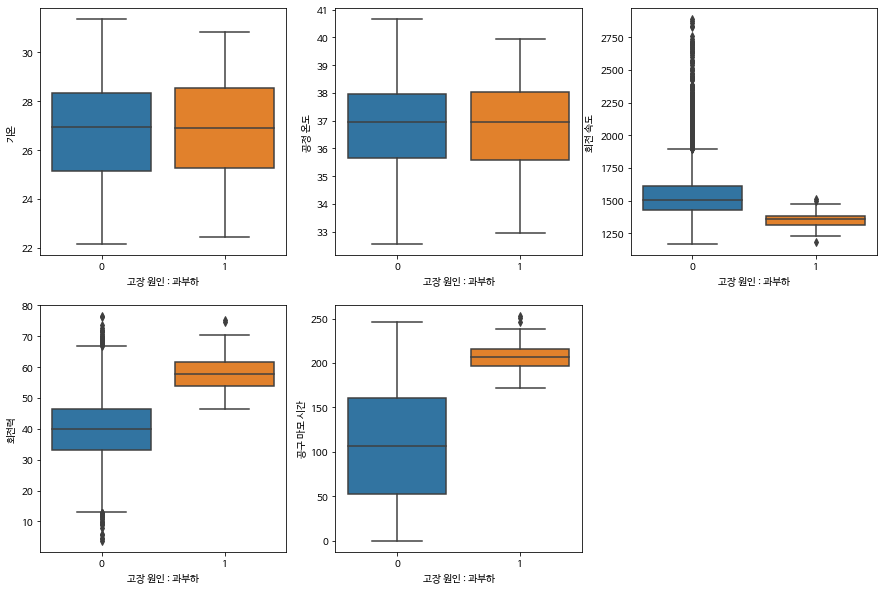

In [24]:
# 각 변수들과 '고장 원인 : 과부하'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 과부하', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 과부하', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 과부하', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 과부하', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 과부하', y='공구 마모 시간', data=df, ax=ax5)

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


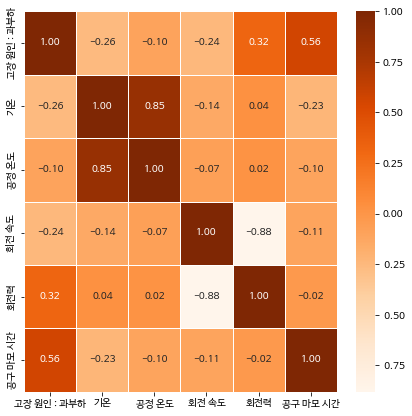

In [25]:
data_OSF = df_fail_1[['고장 원인 : 과부하','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_OSF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Oranges')
#plt.savefig('과부하_수정1-1', transparent = 'True')

<AxesSubplot:xlabel='공구 마모 시간', ylabel='고장 원인 : 과부하'>

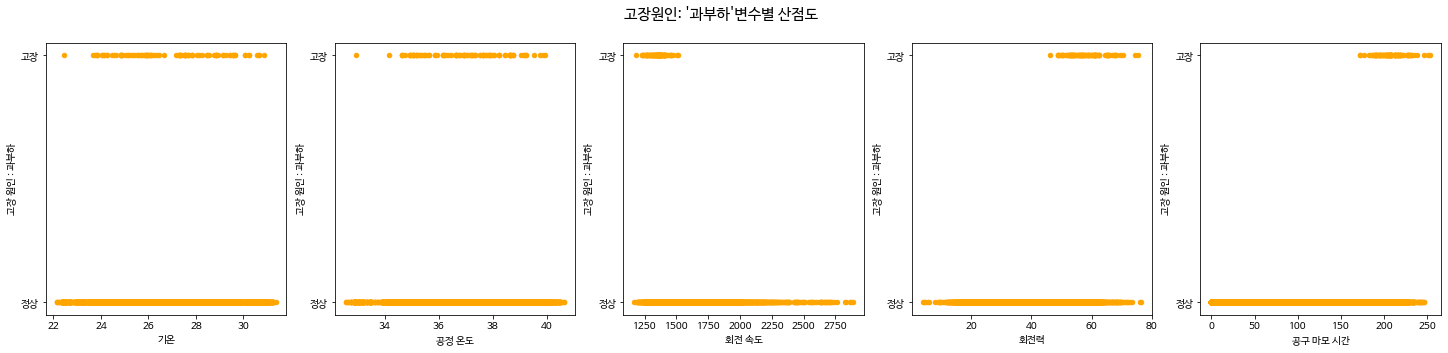

In [26]:
fig = plt.figure(figsize=(25,5))
plt.suptitle("고장원인: '과부하'변수별 산점도",fontsize=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

df_고장.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', color='orange', ax=ax1)
df_고장.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter',color='orange', ax=ax2)
df_고장.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', color='orange',ax=ax3)
df_고장.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', color='orange',ax=ax4)
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', color='orange',ax=ax5)
#plt.savefig('과부하_수정2-1', transparent = 'True')

In [27]:
print(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 과부하'] == 1]['회전력'].min())
print(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].min())

1515
46.3
172


In [28]:
# 해석
# 고장 원인 : 과부하의 경우
# 공구 마모 시간과의 상관계수가 가장 높으며,
# 회전속도 1515 rpm 이하, 회전력 46.3Nm 이상, 공구 마모 시간 172min 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

<AxesSubplot:xlabel='고장 원인 : 동력 이상', ylabel='공구 마모 시간'>

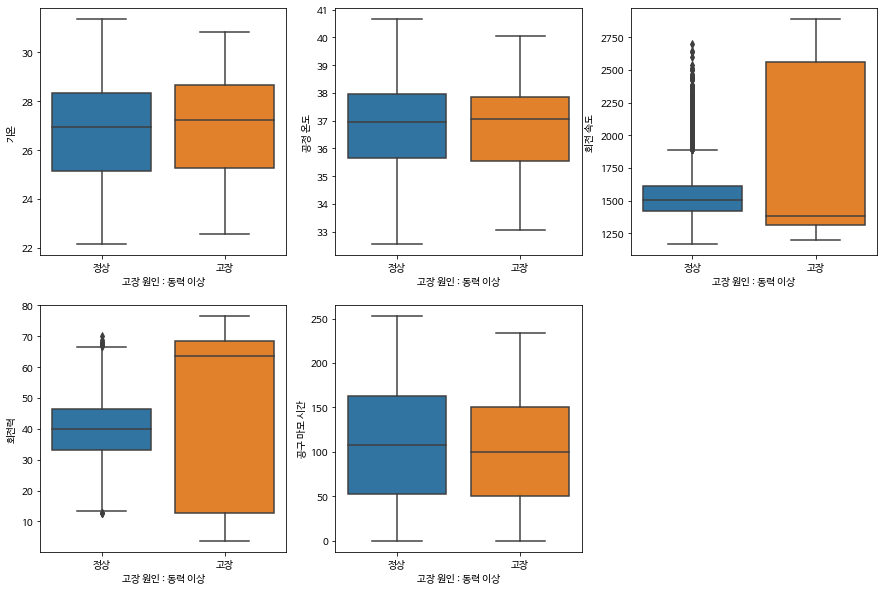

In [29]:
# 각 변수들과 '고장 원인 : 동력 이상'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 동력 이상', y='기온', data=df_고장, ax=ax1)
sns.boxplot(x='고장 원인 : 동력 이상', y='공정 온도', data=df_고장, ax=ax2)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전 속도', data=df_고장, ax=ax3)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전력', data=df_고장, ax=ax4)
sns.boxplot(x='고장 원인 : 동력 이상', y='공구 마모 시간', data=df_고장, ax=ax5)

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


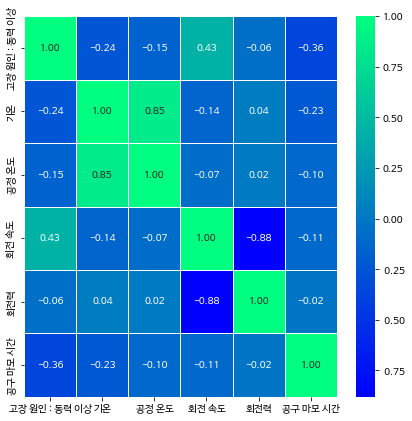

In [30]:
data_PWF = df_fail_1[['고장 원인 : 동력 이상','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_PWF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='winter')
#plt.savefig('동력이상_수정1-1', transparent=True)

<AxesSubplot:xlabel='공구 마모 시간', ylabel='고장 원인 : 동력 이상'>

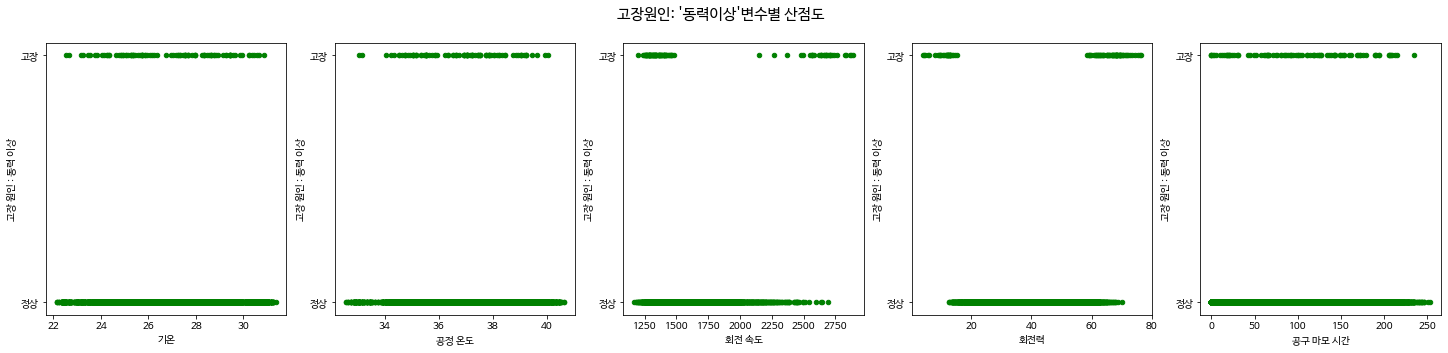

In [31]:
fig = plt.figure(figsize=(25,5))
plt.suptitle("고장원인: '동력이상'변수별 산점도",fontsize=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

df_고장.plot(x='기온', y='고장 원인 : 동력 이상', kind='scatter', c='green', ax=ax1)
df_고장.plot(x='공정 온도', y='고장 원인 : 동력 이상', kind='scatter', c='green',ax=ax2)
df_고장.plot(x='회전 속도', y='고장 원인 : 동력 이상', kind='scatter', c='green',ax=ax3)
df_고장.plot(x='회전력', y='고장 원인 : 동력 이상', kind='scatter', c='green',ax=ax4)
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 동력 이상', kind='scatter', c='green',ax=ax5)
#plt.savefig('동력이상_수정2-1', transparent=True)

In [32]:
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] < 1750)]['회전 속도'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] > 1750)]['회전 속도'].min())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] < 40)]['회전력'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] > 40)]['회전력'].min())

1479
2153
15.3
58.5


In [33]:
# 해석
# 고장 원인 : 동력이상의 경우
# 회전속도와 가장 높은 상관계수를 가지며,
# 회전속도 1479 rpm 이하 또는 2153 rpm 이상, 회전력 15.3Nm 이하 또는 58.5Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

In [34]:
# 3. 종합해 봤을 때, 고장을 막기 위해서는
# 3-1. 기온은 27.65도, 공정 온도는 36.25도를 넘기지 않는 환경에서,
# 3-2. 회전속도는 1515~2153rpm 수준으로, 회전력은 15.3~46.3Nm 수준으로 유지하고,
# 3-3. 공구 마모 시간은 172min을 넘기지 않도록 하는 것이 방안이 될 수 있겠다.

# 3. 추가 분석

In [35]:
# 랜덤 고장원인 분석을 위한 DATA 생성
df_HDF = df.loc[df['고장 원인 : 열 방산'] == 1].copy()
df_PWF = df.loc[df['고장 원인 : 동력 이상'] == 1].copy()
df_OSF = df.loc[df['고장 원인 : 과부하'] == 1].copy()
df_RNF = df.loc[df['고장 원인 : 무작위'] == 1].copy()

In [36]:
print(df['기온'].sum() / len(df['기온']))
print(df[df['고장 원인 : 열 방산'] == 1]['기온'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['기온']))
print(df[df['고장 원인 : 과부하'] == 1]['기온'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['기온']))
print(df[df['고장 원인 : 동력 이상'] == 1]['기온'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['기온']))

26.85493000000002
29.410869565217414
26.894897959183698
26.925789473684237


In [37]:
print(df['공정 온도'].sum() / len(df['공정 온도']))
print(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공정 온도']))
print(df[df['고장 원인 : 과부하'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공정 온도']))
print(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도']))

36.85556000000002
37.63869565217393
36.92346938775513
36.804736842105285


In [38]:
print(df['회전 속도'].sum() / len(df['회전 속도']))
print(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전 속도']))
print(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전 속도']))
print(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도']))

1538.7761
1337.2608695652175
1350.3265306122448
1763.9684210526316


In [39]:
print(df['회전력'].sum() / len(df['회전력']))
print(df[df['고장 원인 : 열 방산'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전력']))
print(df[df['고장 원인 : 과부하'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전력']))
print(df[df['고장 원인 : 동력 이상'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전력']))

39.986909999999995
53.16695652173913
58.37040816326531
48.51473684210526


In [40]:
print(df['공구 마모 시간'].sum() / len(df['공구 마모 시간']))
print(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간']))
print(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간']))
print(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간']))

107.951
107.19130434782609
207.69387755102042
101.88421052631578


In [41]:
# 해석
# 기온은 '열 방산'이 있을 때 평균값이 더 높았다.
# 공정온도의 평균값은 별다른 차이를 보이지 않았다.
# 회전 속도의 평균값은 '열 방산', '과부하' 때에는 낮은 수치를, '동력 이상' 대에는 높은 수치를 보였다.
# 회전력의 평균값은 모든 고장 원인에서 높은 수치를 보였다.
# 공구 마모 시간의 평균값은 '과부하'가 일어날 때 높은 수치를 보였다.

# 4. 공구 마모 시간 분석

In [42]:
# '공구 마모 시간' 패턴 확인
df[df['공구 마모 시간'] >= 200].head(50)

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
74,L47253,L,25.85,35.95,1592,35.0,200,0,0,0,0,0,0,0
75,L47254,L,25.75,35.85,1601,32.3,202,0,0,0,0,0,0,0
76,L47255,L,25.65,35.75,1379,46.7,204,0,0,0,0,0,0,0
77,L47256,L,25.65,35.75,1461,47.9,206,0,0,0,0,0,0,0
78,L47257,L,25.65,35.75,1455,41.3,208,1,1,0,0,0,0,1
157,M15016,M,25.25,34.95,1495,46.0,203,0,0,0,0,0,0,0
158,H29571,H,25.25,35.05,1478,43.5,206,0,0,0,0,0,0,0
159,M15018,M,25.25,35.05,1499,40.0,211,0,0,0,0,0,0,0
160,L47339,L,25.25,35.05,1471,47.0,214,0,0,0,0,0,0,0


In [43]:
# 0에서 200 언저리까지 증가하다가 기계 고장이 일어난 후 교체되는 형태를 보인다.

In [44]:
# 공구 마모 고장 평균 시간
df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'])

216.3695652173913

In [45]:
# 공구 교체 시기 제외 코드
from numpy import NaN
df_replace = []
for i in range(len(df) - 1):
    if df['공구 마모 시간'][i+1] > df['공구 마모 시간'][i+2]:
        df_replace.append(df['공구 마모 시간'][i+1])
        df['공구 마모 시간'][i+1] = NaN
df.dropna(inplace=True)

<ipython-input-45-509d37d2f3a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['공구 마모 시간'][i+1] = NaN
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
# 공구 교체 횟수
len(df_replace)

119

In [47]:
# 공구 교체 주기 평균
sum(df_replace) / len(df_replace)

215.65546218487395

In [48]:
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                       265357.05
공정 온도                                                    364174.35
회전 속도                                                     15204088
회전력                                                       395132.4
공구 마모 시간                                                 1053847.0
고장 여부                                                          284
고장 원인 : 공구 마모                                                    0
고장 원인 : 열 방산                                                   114
고장 원인 : 동력 이상                                                   94
고장 원인 : 과부하                                                     87
고장 원인 : 무작위                                                     17
고장 요인 합계                                                       312
dtype: object

In [49]:
# 공구 교체 시기(119회)를 제외하니 고장 원인 : 공구 마모(46회)가 0회로 줄어들었다.

# 5. 랜덤 고장 분석

In [50]:
# 이상치 데이터 : Machine failure 중 failure 유형이 없는 데이터 9개 확인 및 생성 
df_failure_add = df[(df['고장 여부']==1) & (df['고장 원인 : 공구 마모']==0) & (df['고장 원인 : 열 방산']==0) & (df['고장 원인 : 동력 이상']==0) & (df['고장 원인 : 과부하']==0) & (df['고장 원인 : 무작위']==0)].copy()
df_failure_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40.0,1,0,0,0,0,0,0
2750,M17609,M,26.55,36.05,1685,28.9,179.0,1,0,0,0,0,0,0
4045,M18904,M,28.75,37.75,1419,47.7,20.0,1,0,0,0,0,0,0
4685,M19544,M,30.45,38.65,1421,44.8,101.0,1,0,0,0,0,0,0
5537,M20396,M,29.15,38.65,1363,54.0,119.0,1,0,0,0,0,0,0
5942,L53121,L,27.45,37.55,1438,48.5,78.0,1,0,0,0,0,0,0
6479,L53658,L,27.35,36.65,1663,29.1,145.0,1,0,0,0,0,0,0
8507,L55686,L,25.25,36.45,1710,27.3,163.0,1,0,0,0,0,0,0
9016,L56195,L,24.05,34.95,1431,49.7,210.0,1,0,0,0,0,0,0


In [51]:
# 전처리 df_failure_add 데이터 값 수정 (고장여부  : 1 -> 0 / 고장원인 무작위 : 0 -> 1) 
df_failure_add['고장 여부'].replace(1,0, inplace = True)
df_failure_add['고장 원인 : 무작위'].replace(0,1, inplace = True)
df_failure_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40.0,0,0,0,0,0,1,0
2750,M17609,M,26.55,36.05,1685,28.9,179.0,0,0,0,0,0,1,0
4045,M18904,M,28.75,37.75,1419,47.7,20.0,0,0,0,0,0,1,0
4685,M19544,M,30.45,38.65,1421,44.8,101.0,0,0,0,0,0,1,0
5537,M20396,M,29.15,38.65,1363,54.0,119.0,0,0,0,0,0,1,0
5942,L53121,L,27.45,37.55,1438,48.5,78.0,0,0,0,0,0,1,0
6479,L53658,L,27.35,36.65,1663,29.1,145.0,0,0,0,0,0,1,0
8507,L55686,L,25.25,36.45,1710,27.3,163.0,0,0,0,0,0,1,0
9016,L56195,L,24.05,34.95,1431,49.7,210.0,0,0,0,0,0,1,0


In [53]:
# 고장 원인 : 랜덤고장 의 경우 애초에 기계 고장 데이터에 포함되지도 않았지만 
# 일부 data 고장 여부 1, 고장원인 공구 마로로 분류되어 있음 
# 전처리 df_RNF 데이터 값 수정 (고장여부 : 1 -> 0 / 공구마모 : 1 -> 0) 
df_RNF['고장 여부'].replace(1,0, inplace = True)
df_RNF['고장 원인 : 공구 마모'].replace(1,0, inplace = True)
df_RNF

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207,0,0,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170,0,0,0,0,0,1,1


In [54]:
# 이상치 분석을 위한 RNF 와 failure만 분류한 것 합친 데이터 28 (19+9) 데이터 생성 
df_RNF_plus = pd.concat([df_RNF, df_failure_add])
df_RNF_plus

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132.0,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144.0,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166.0,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189.0,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140.0,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95.0,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2.0,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207.0,0,0,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170.0,0,0,0,0,0,1,1


In [ ]:
# 이상치 데이터 CSV 파일 추출
#df_RNF_plus.to_csv('/content/RNF_plus', index=False)

In [55]:
# RNF 데이터에 더해 합치기 (28개 = 9 +19), 고장 발생 전체와의 상관관계 분석을 위한 열방산, 동력 이상, 과부하 데이터도 함께 합침  
df_RNF_add = pd.concat([df_RNF, df_failure_add,df_HDF,df_PWF,df_OSF])
df_RNF_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132.0,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144.0,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166.0,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189.0,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140.0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,L56844,L,25.95,37.05,1317,54.8,231.0,1,0,0,0,1,0,1
9668,L56847,L,26.05,37.15,1352,48.9,238.0,1,0,0,0,1,0,1
9823,L57002,L,25.35,36.25,1360,60.9,187.0,1,0,0,0,1,0,1


In [56]:
df_RNF_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1222 to 9975
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   제품 ID          336 non-null    object 
 1   제품 유형          336 non-null    object 
 2   기온             336 non-null    float64
 3   공정 온도          336 non-null    float64
 4   회전 속도          336 non-null    int64  
 5   회전력            336 non-null    float64
 6   공구 마모 시간       336 non-null    float64
 7   고장 여부          336 non-null    int64  
 8   고장 원인 : 공구 마모  336 non-null    int64  
 9   고장 원인 : 열 방산   336 non-null    int64  
 10  고장 원인 : 동력 이상  336 non-null    int64  
 11  고장 원인 : 과부하    336 non-null    int64  
 12  고장 원인 : 무작위    336 non-null    int64  
 13  고장 요인 합계       336 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 39.4+ KB


In [57]:
df_RNF_add.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,27.816071,37.177083,1474.636905,52.525000,136.250000,0.916667,0.011905,0.369048,0.327381,0.345238,0.083333,1.113095
std,2.054971,1.346708,381.454270,15.987983,71.447862,0.276798,0.108619,0.483267,0.469957,0.476155,0.276798,0.407769
min,22.450000,32.950000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.950000,36.525000,1320.750000,48.500000,76.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,28.550000,37.250000,1360.000000,55.300000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,29.450000,38.050000,1401.250000,62.400000,202.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,30.850000,40.050000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# 6. 고장 원인 별 평균 값 산출

In [58]:
# 정상 제품 최소, 평균, 최대 값
df_fail_0.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.0,9661.0,9661.0,9661.0,9661.0,9661.000000,9661.000000
mean,26.823999,36.845570,1540.260014,39.629655,106.693717,0.0,0.0,0.0,0.0,0.0,0.001863,0.001863
std,1.990748,1.486846,167.394734,9.472080,62.945790,0.0,0.0,0.0,0.0,0.0,0.043126,0.043126
min,22.150000,32.550000,1168.000000,12.600000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,25.150000,35.650000,1429.000000,33.100000,52.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,26.850000,36.850000,1507.000000,39.900000,107.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,28.350000,37.950000,1615.000000,46.300000,160.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,31.350000,40.650000,2695.000000,70.000000,246.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


In [59]:
# 열방산 고장 원인  최소, 평균, 최대 값
df_HDF.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.0,115.0,115.000000,115.000000,115.0,115.000000
mean,29.410870,37.638696,1337.260870,53.166957,107.191304,1.0,0.0,1.0,0.026087,0.052174,0.0,1.078261
std,0.601853,0.644513,34.745967,6.223494,63.629257,0.0,0.0,0.0,0.160092,0.223351,0.0,0.269757
min,27.650000,36.250000,1212.000000,41.600000,2.000000,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
25%,28.950000,37.150000,1319.000000,48.200000,57.000000,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
50%,29.350000,37.550000,1346.000000,52.600000,106.000000,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
75%,29.900000,38.150000,1363.500000,57.050000,161.000000,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
max,30.550000,39.050000,1379.000000,68.200000,229.000000,1.0,0.0,1.0,1.000000,1.000000,0.0,2.000000


In [60]:
# 동력 이상 고장 원인  최소, 평균, 최대 값
df_PWF.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.0,95.000000,95.0,95.000000
mean,26.925789,36.804737,1763.968421,48.514737,101.884211,1.0,0.010526,0.031579,1.0,0.126316,0.0,1.168421
std,2.147127,1.600450,620.829138,26.788653,64.355704,0.0,0.102598,0.175804,0.0,0.333967,0.0,0.403512
min,22.550000,33.050000,1200.000000,3.800000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.000000
25%,25.250000,35.550000,1312.500000,12.800000,50.500000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.000000
50%,27.250000,37.050000,1386.000000,63.600000,100.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.000000
75%,28.650000,37.850000,2563.500000,68.400000,150.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.000000
max,30.850000,40.050000,2886.000000,76.600000,234.000000,1.0,1.000000,1.000000,1.0,1.000000,0.0,3.000000


In [61]:
# 과부하 고장 원인  최소, 평균, 최대 값
df_OSF.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.000000,98.000000,98.0,98.0,98.000000
mean,26.894898,36.923469,1350.326531,58.370408,207.693878,1.0,0.030612,0.061224,0.122449,1.0,0.0,1.214286
std,2.028565,1.511028,61.250841,5.943587,15.811002,0.0,0.173150,0.240974,0.329489,0.0,0.0,0.436717
min,22.450000,32.950000,1181.000000,46.300000,172.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000
25%,25.275000,35.575000,1313.000000,53.825000,197.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000
50%,26.900000,36.950000,1360.500000,57.700000,207.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000
75%,28.525000,38.025000,1382.250000,61.675000,216.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000
max,30.850000,39.950000,1515.000000,75.400000,253.000000,1.0,1.000000,1.000000,1.000000,1.0,0.0,3.000000


In [62]:
# 열방산과 정상 제품 최소, 평균, 최대 값차이
df_HDF.describe() - df_fail_0.describe() 

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,-9546.000000,-9546.000000,-9546.000000,-9546.000000,-9546.000000,-9546.0,-9546.0,-9546.0,-9546.000000,-9546.000000,-9546.000000,-9546.000000
mean,2.586871,0.793126,-202.999145,13.537301,0.497587,1.0,0.0,1.0,0.026087,0.052174,-0.001863,1.076398
std,-1.388895,-0.842333,-132.648767,-3.248586,0.683467,0.0,0.0,0.0,0.160092,0.223351,-0.043126,0.226631
min,5.500000,3.700000,44.000000,29.000000,2.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000
25%,3.800000,1.500000,-110.000000,15.100000,5.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000
50%,2.500000,0.700000,-161.000000,12.700000,-1.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000
75%,1.550000,0.200000,-251.500000,10.750000,1.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000
max,-0.800000,-1.600000,-1316.000000,-1.800000,-17.000000,1.0,0.0,1.0,1.000000,1.000000,-1.000000,1.000000


In [63]:
# 과부하와 정상 제품 최소, 평균, 최대 값차이

df_OSF.describe() - df_fail_0.describe() 

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,-9563.000000,-9563.000000,-9563.000000,-9563.000000,-9563.000000,-9563.0,-9563.000000,-9563.000000,-9563.000000,-9563.0,-9563.000000,-9563.000000
mean,0.070899,0.077900,-189.933484,18.740753,101.000161,1.0,0.030612,0.061224,0.122449,1.0,-0.001863,1.212423
std,0.037817,0.024182,-106.143893,-3.528493,-47.134788,0.0,0.173150,0.240974,0.329489,0.0,-0.043126,0.393591
min,0.300000,0.400000,13.000000,33.700000,172.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
25%,0.125000,-0.075000,-116.000000,20.725000,145.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
50%,0.050000,0.100000,-146.500000,17.800000,100.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
75%,0.175000,0.075000,-232.750000,15.375000,56.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,-0.500000,-0.700000,-1180.000000,5.400000,7.000000,1.0,1.000000,1.000000,1.000000,1.0,-1.000000,2.000000


In [64]:
# 동력이상과 정상 제품 최소, 평균, 최대 값차이

df_PWF.describe() - df_fail_0.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
count,-9566.000000,-9566.000000,-9566.000000,-9566.000000,-9566.000000,-9566.0,-9566.000000,-9566.000000,-9566.0,-9566.000000,-9566.000000,-9566.000000
mean,0.101791,-0.040833,223.708407,8.885082,-4.809506,1.0,0.010526,0.031579,1.0,0.126316,-0.001863,1.166558
std,0.156379,0.113604,453.434404,17.316572,1.409914,0.0,0.102598,0.175804,0.0,0.333967,-0.043126,0.360386
min,0.400000,0.500000,32.000000,-8.800000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
25%,0.100000,-0.100000,-116.500000,-20.300000,-1.500000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
50%,0.400000,0.200000,-121.000000,23.700000,-7.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
75%,0.300000,-0.100000,948.500000,22.100000,-10.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
max,-0.500000,-0.600000,191.000000,6.600000,-12.000000,1.0,1.000000,1.000000,1.0,1.000000,-1.000000,2.000000
